# Mini-Map

### _Development Notebook_

Creates an overview map of all domians within a file and plots where the current domain is in relation to them.

In [7]:
import sys;sys.path.append('../')
from hecrasio.core import ResultsZip
from hecrasio.qaqc import *

#### Read model output data 

*from AWS*




In [8]:
model_s3path = "s3://azavea/jwx_test/data/zip/ARLAMS.p01.zip"
model = ResultsZip(model_s3path, require_prj=False, pfra=False)

In [10]:
hdfResults_paths = [f for f in model.contents if '.hdf' in f]

In [11]:
hdfResults_path = hdfResults_paths[0]
rasPlan = HDFResultsFile(model, hdfResults_path)


### 1A. Plan Information

   

In [12]:
rasPlan.Plan_Information

,Results
Base Output Interval,1HOUR
Computation Time Step Base,30SEC
Flow Filename,ARLAMS.u01
Flow Title,Precip_Excess
Geometry Filename,ARLAMS.g01
Geometry Title,ARLAMS_Pluvial
Plan Filename,ARLAMS.p01
Plan Name,reducedPluvial_E005
Plan ShortID,reducedPluvial_E005
Plan Title,reducedPluvial_E005


### 1B. Plan Parameters


In [13]:
rasPlan.Plan_Parameters

,Results
1D Cores,0
1D Methodology,Finite Difference
1D2D Flow Tolerance,0.1
1D2D MaxIter,0
1D2D Minimum Flow Tolerance,1
1D2D WS Tolerance,0.01
2D Boundary Condition Ramp Up Fraction,"[0.1, 0.1, 0.1, 0.1, 0.1]"
2D Boundary Condition Volume Check,"[b'False', b'False', b'False', b'False', b'Fal..."
2D Cores,0
2D Coriolis,False


### 1C. Boundary Conditions 

#### Input hydrographs

* Need to update notebook for multiple domains

In [19]:
# Why is there so many "Unable to open" errors? Can I supress this?
results = [DomainResults(model, rasPlan, domainID) for domainID in rasPlan.domains]

# Get bounds for domains
perimeters = [result.Perimeter for result in results]

# Cat domains into large AOI
df = pd.concat(perimeters).reset_index(drop=True)
gdf = gpd.GeoDataFrame(df)

for result in results:
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf.plot(ax=ax)
    result.Perimeter.plot(color='r', alpha=0.5,ax=ax)

"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"


"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"


/home/jwall/anaconda3/envs/geos/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"
"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"


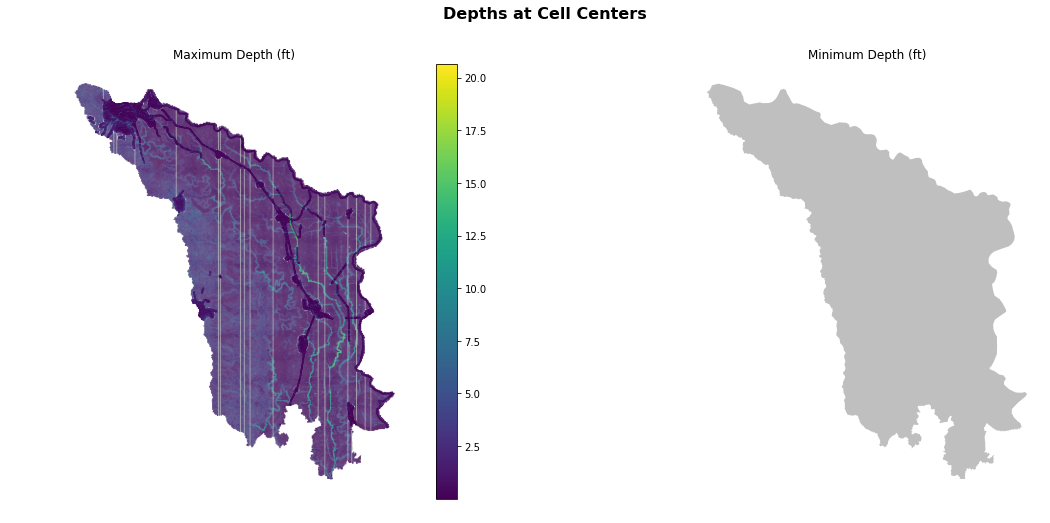

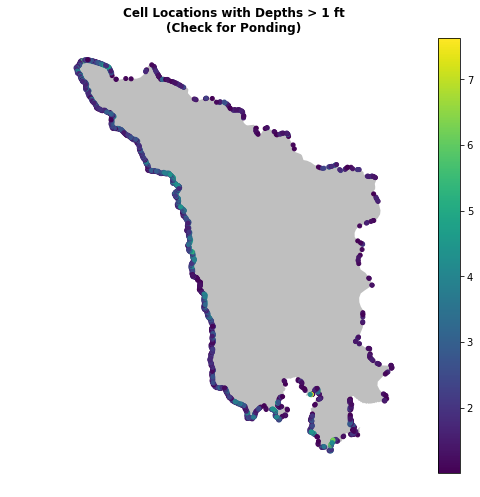

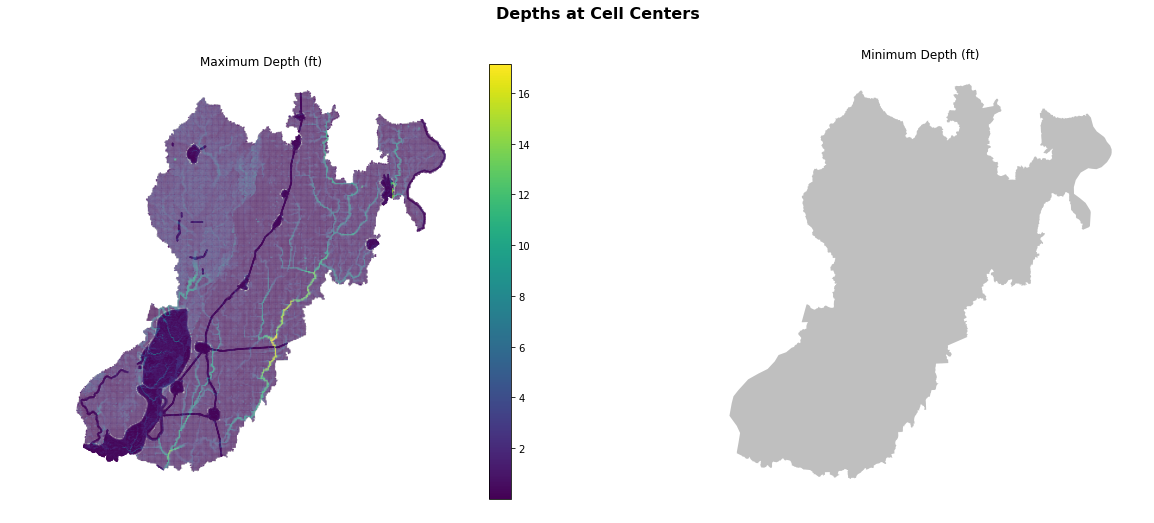

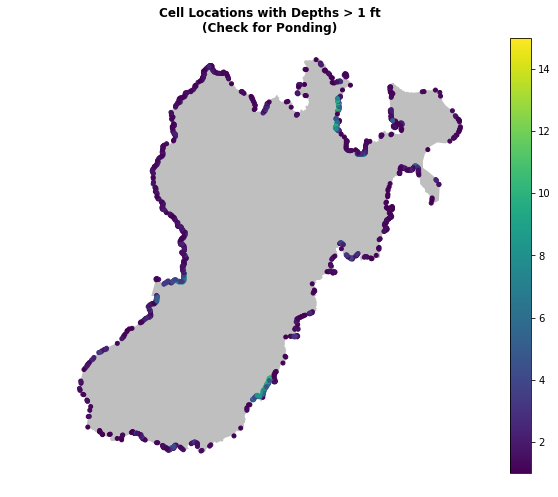

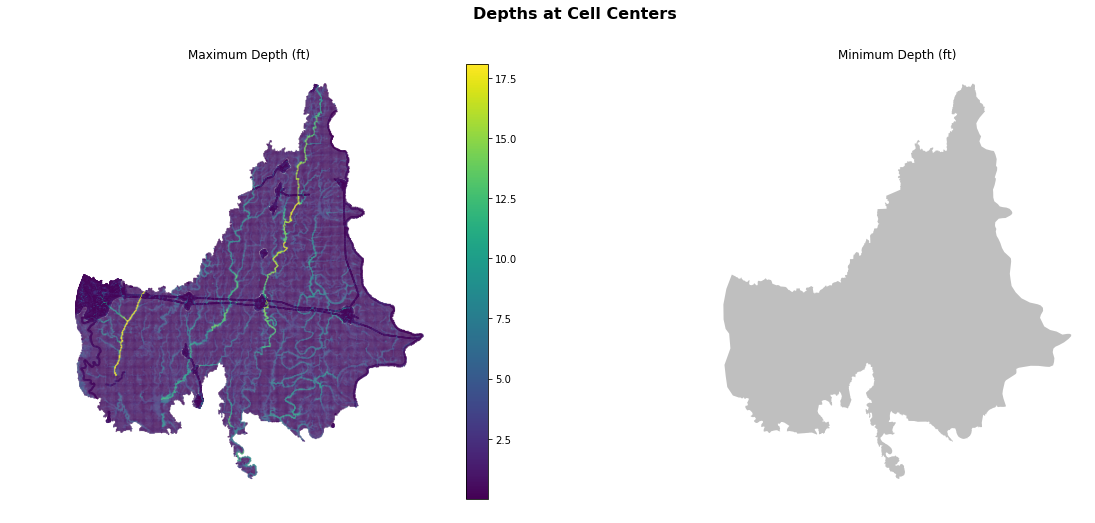

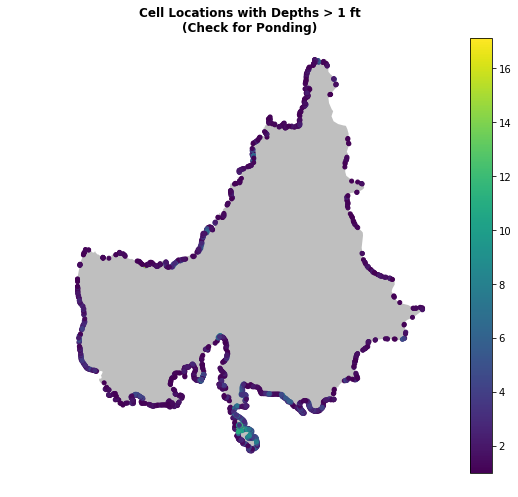

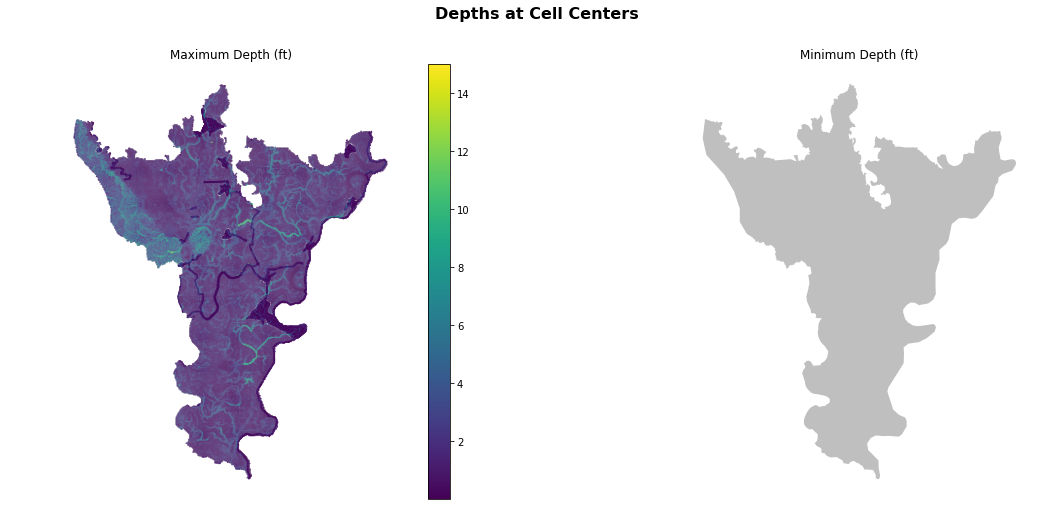

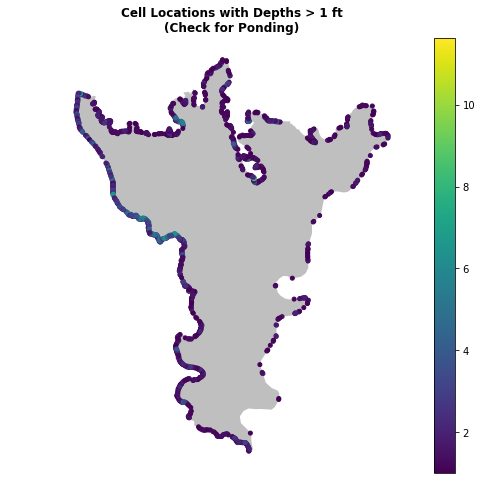

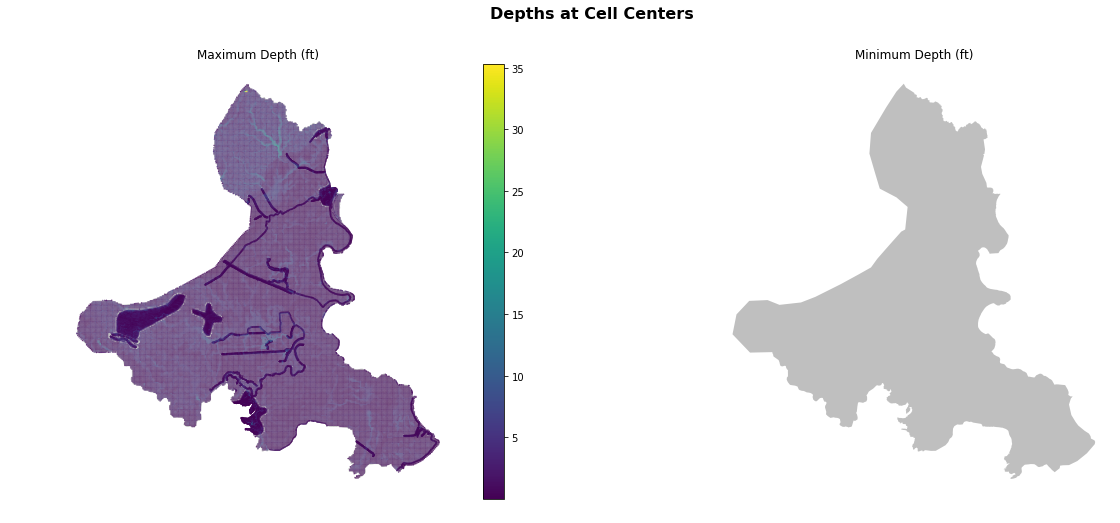

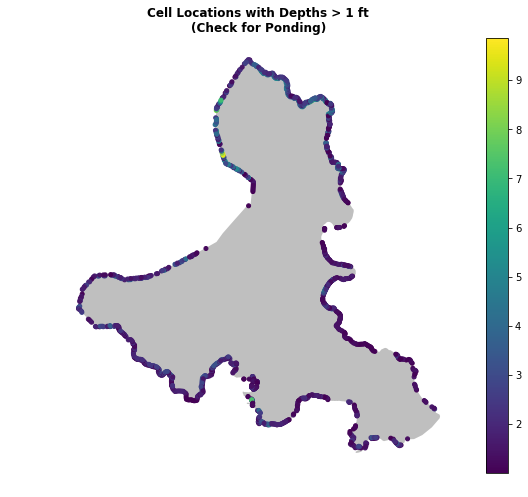

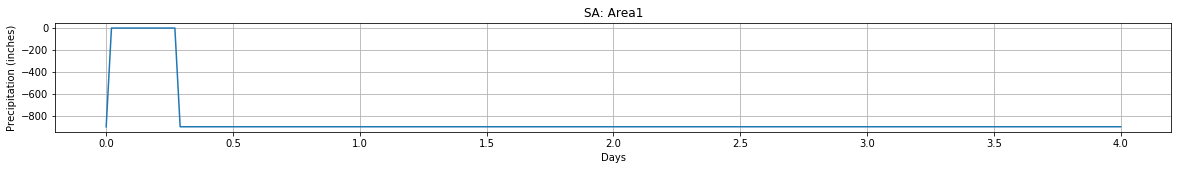

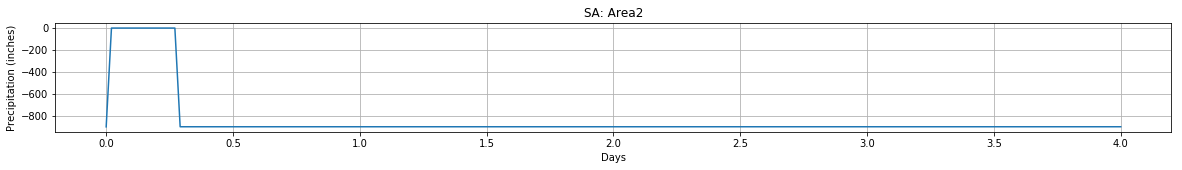

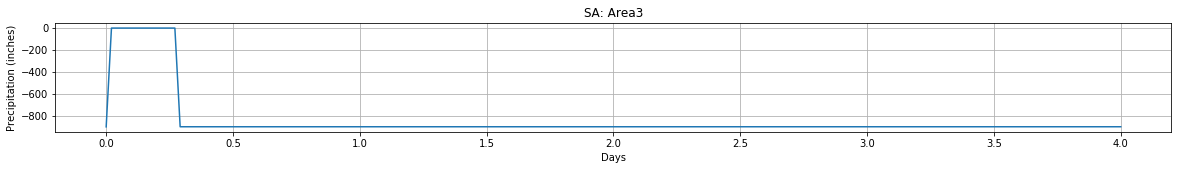

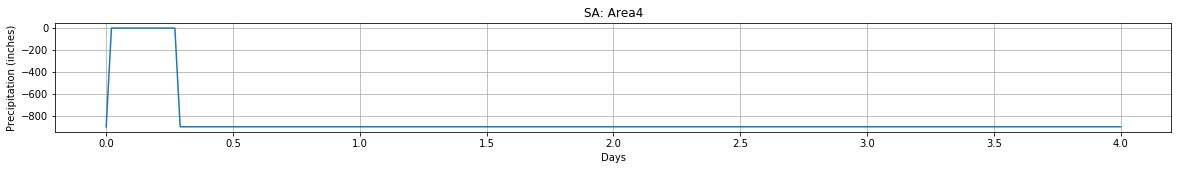

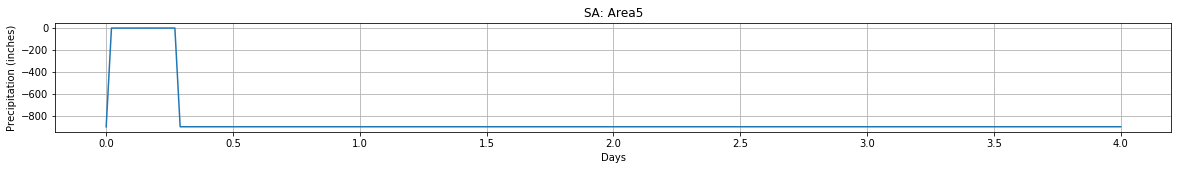

In [15]:
# This needs to be rewrriten to take the above dissolve gdf
    plot_descriptive_stats(results.Describe_Depths, results.Perimeter)
    plot_extreme_edges(results.Extreme_Edges, results.Perimeter)
    
plotBCs(results)

### 2A. Computational Summary



In [16]:
rasPlan.summary

,Results
Computation Time DSS,00:00:00
Computation Time Total,02:36:45
Maximum WSEL Error,0
Run Time Window,04JAN2019 20:04:14 to 04JAN2019 22:40:54
Solution,Unsteady Finished Successfully
Time Solution Went Unstable,NaN
Time Stamp Solution Went Unstable,Not Applicable
Vol Accounting,Volume Accounting in Acre Feet
Vol Accounting 2D Bdry,0
Vol Accounting Cell End,662727


In [17]:
velCheckMain(results, plot_tseries=3)

No Velocity Errors Found


# END